*source: https://www.geeksforgeeks.org/disease-prediction-using-machine-learning/*

**This notebook contains additional cell blocks added by the author (Ali Rahmanianaraki) of it.**

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

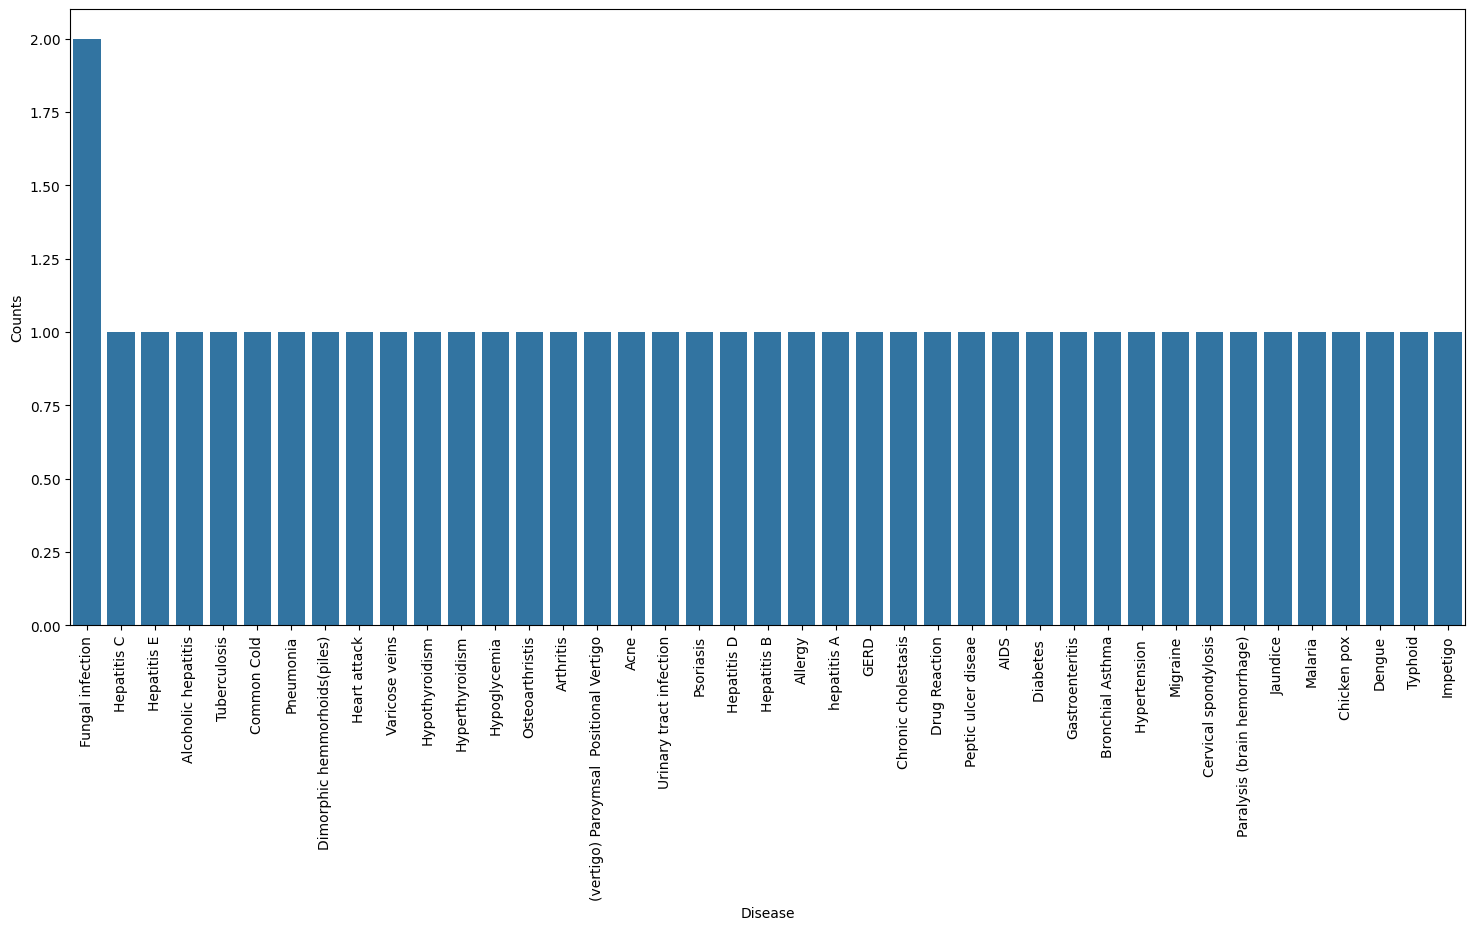

In [4]:
DATA_PATH = "D:\MajorProject\MajorProject\RiskAssess\Dataset\Testing.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

disease_counts = data['prognosis'].value_counts()
temp_df = pd.DataFrame({"Disease": disease_counts.index, "Counts":disease_counts.values})

plt.figure(figsize=(18,8))
sns.barplot(x='Disease', y='Counts', data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [5]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
itching,1,0,0,1,1,0,0,0,0,0
skin_rash,1,0,0,0,1,0,0,0,0,0
nodal_skin_eruptions,1,0,0,0,0,0,0,0,0,0
continuous_sneezing,0,1,0,0,0,0,0,0,0,0
shivering,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,0,0,0,0,0,0,0,0,0,0
blister,0,0,0,0,0,0,0,0,0,0
red_sore_around_nose,0,0,0,0,0,0,0,0,0,0
yellow_crust_ooze,0,0,0,0,0,0,0,0,0,0


In [6]:
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

In [7]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
itching,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
skin_rash,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
nodal_skin_eruptions,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
continuous_sneezing,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shivering,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
blister,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
red_sore_around_nose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
yellow_crust_ooze,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


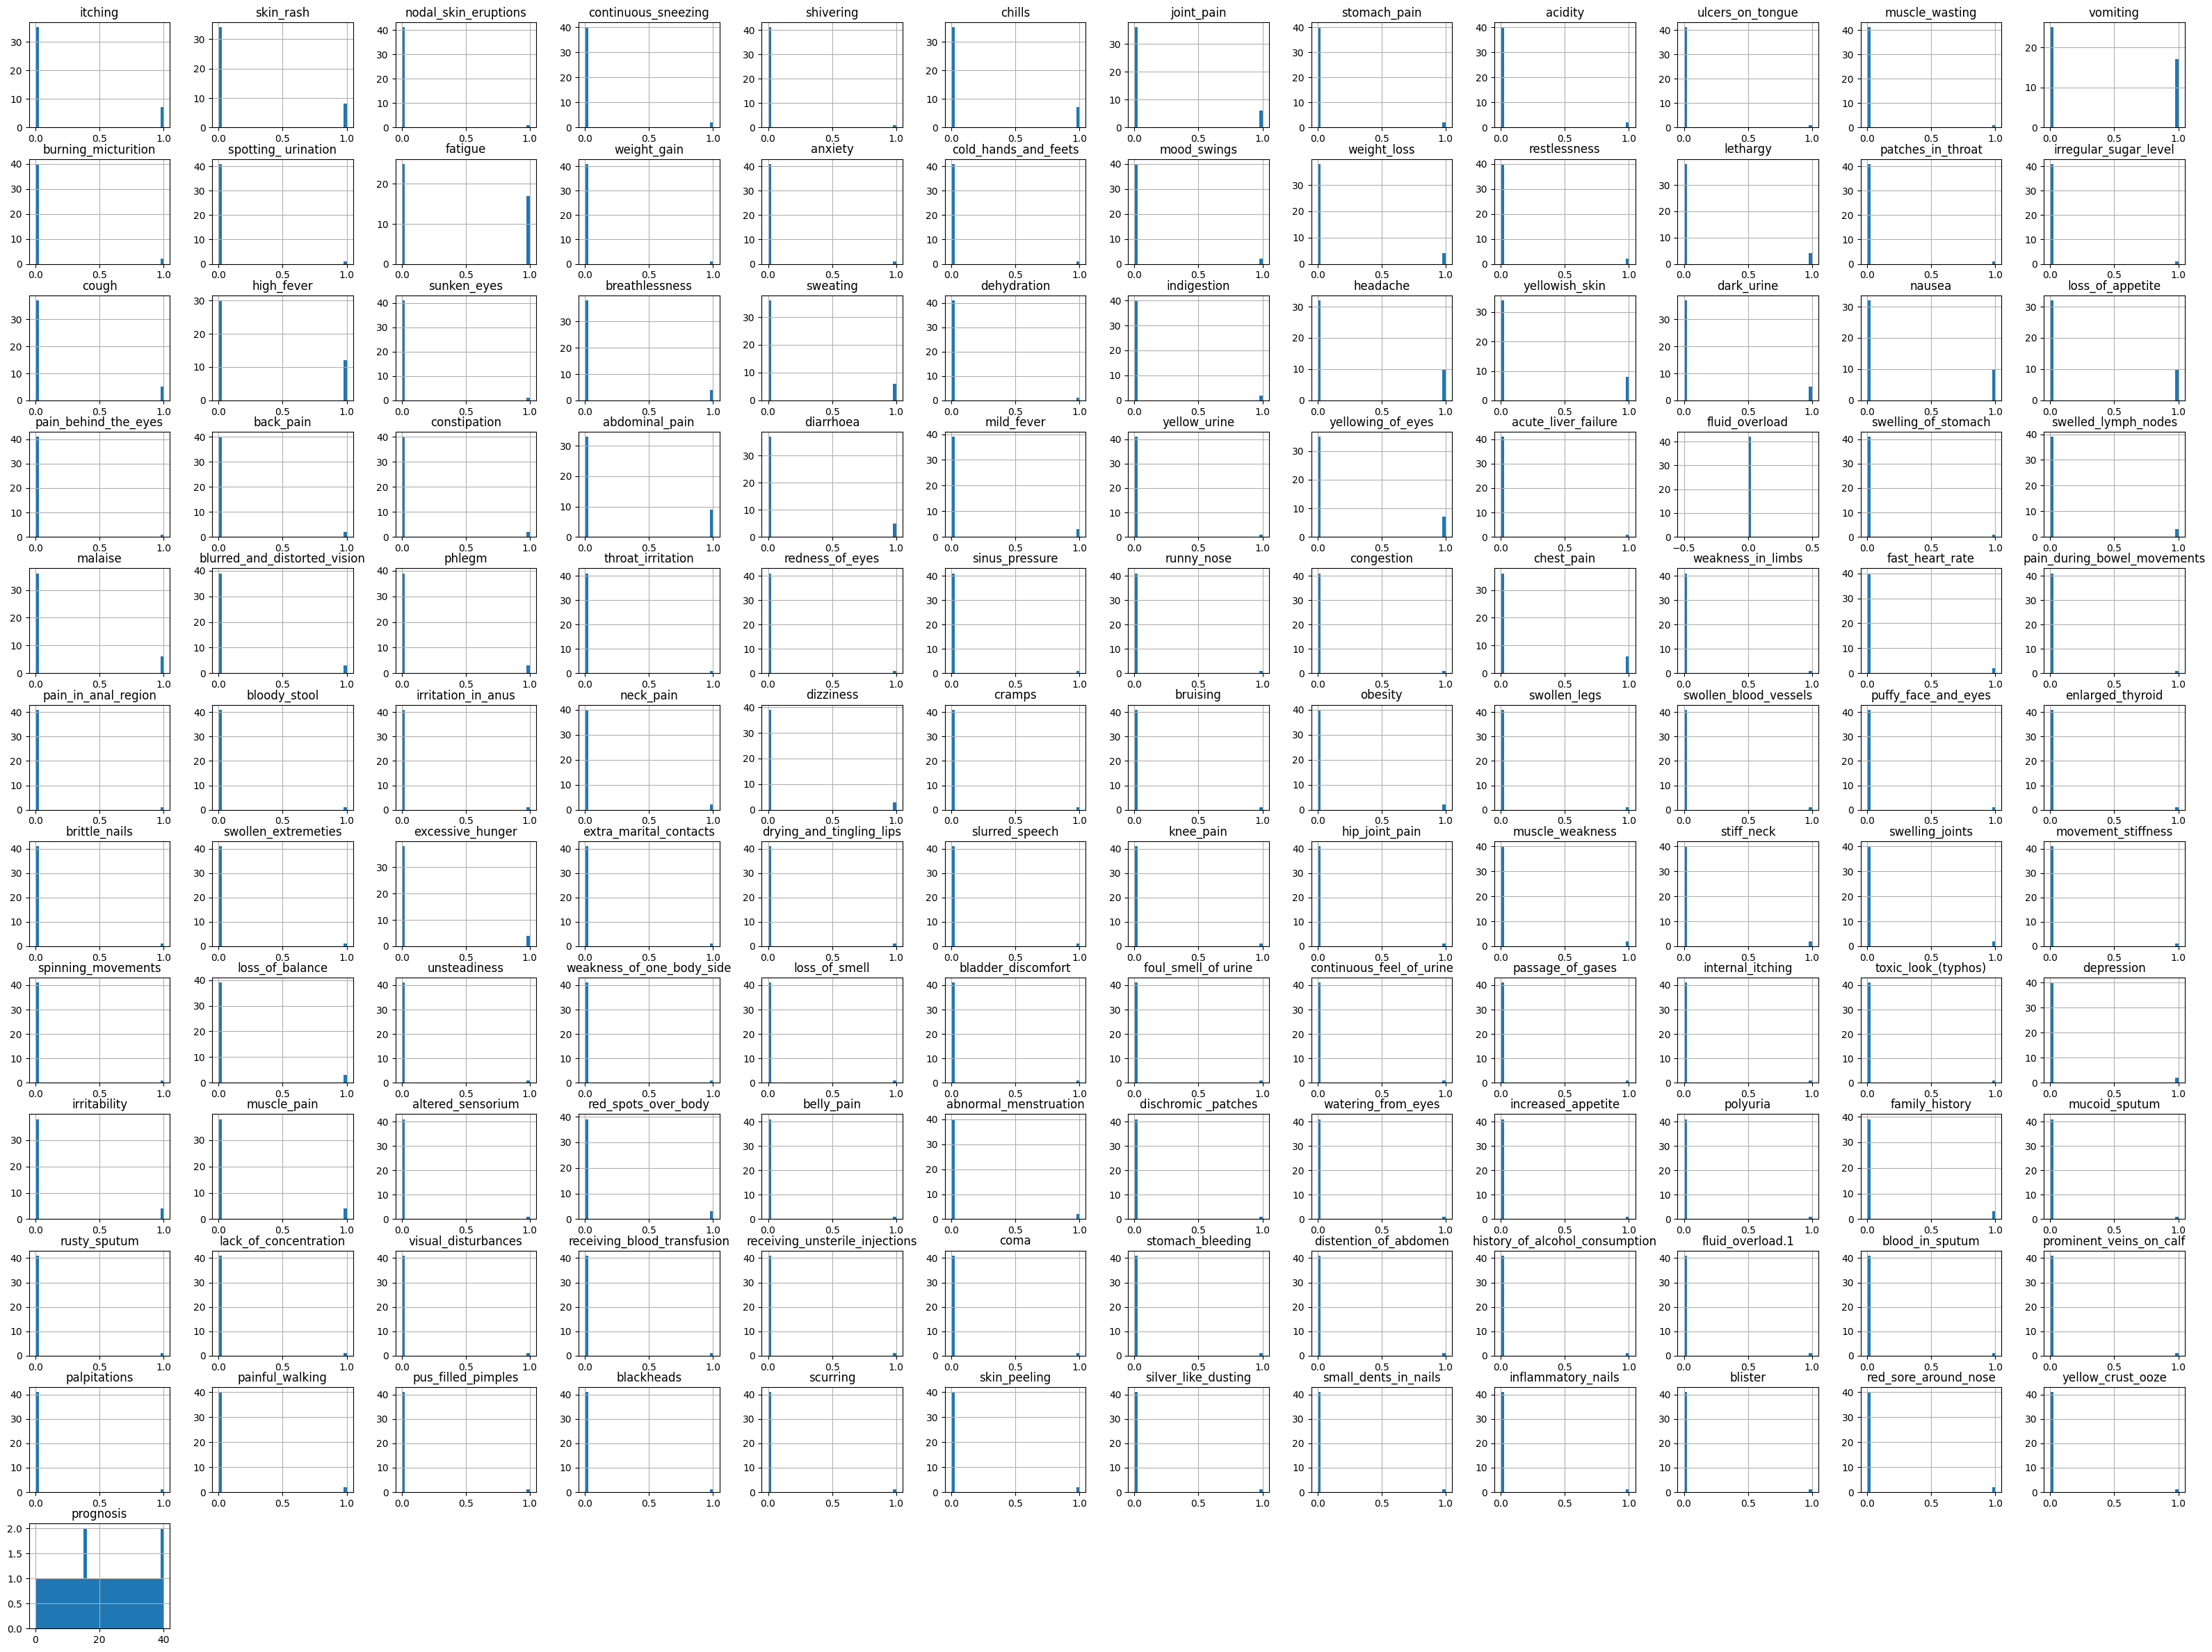

In [8]:
data.hist(bins=40, figsize=(40,30))
plt.show()

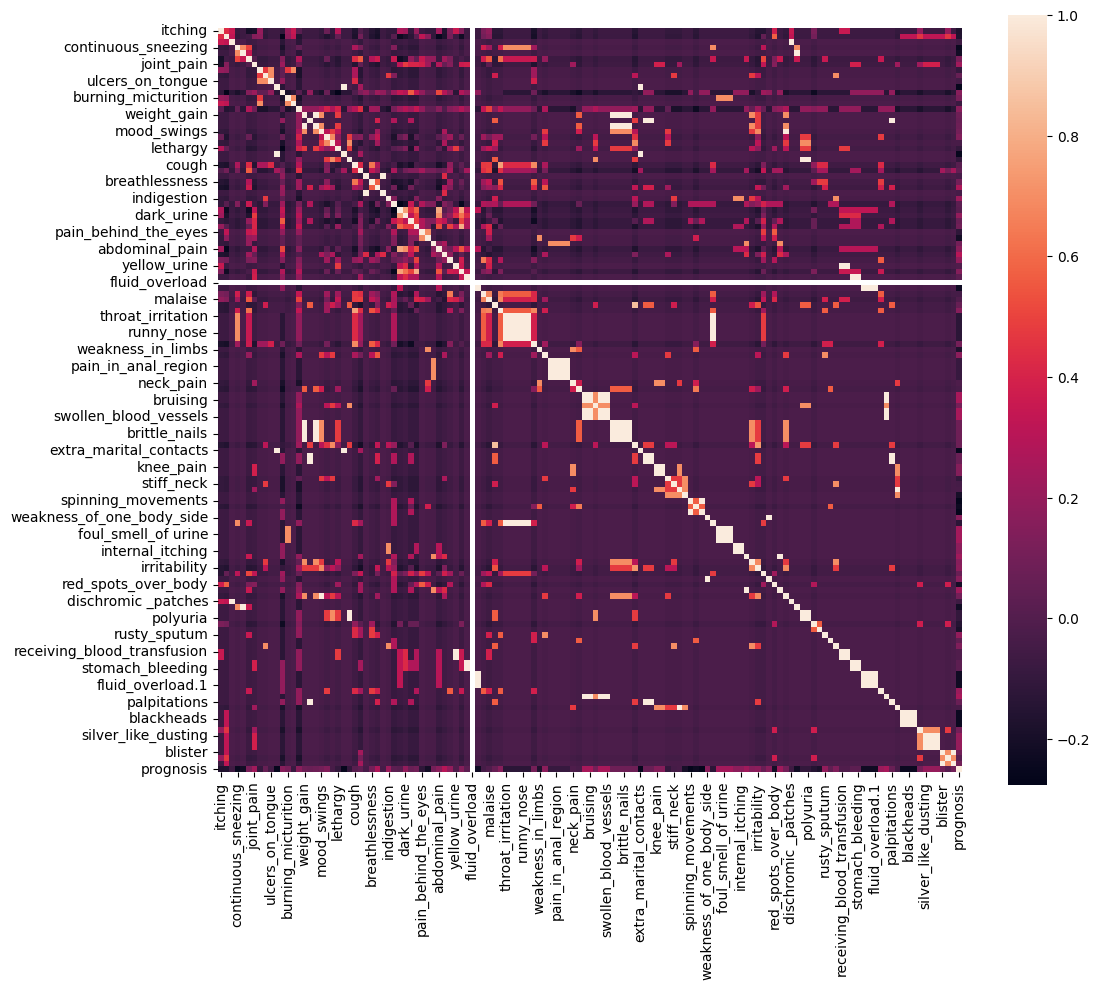

In [9]:
corrmat = data.corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

In [10]:
X = data.drop('prognosis', axis=1)
y = data.prognosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (33, 132), (33,)
Test: (9, 132), (9,)


In [12]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "RandomForest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

ValueError: n_splits=10 cannot be greater than the number of members in each class.

Accuracy on train data by SVM Classifier: 90.9090909090909
Accuracy on test data by SVM Classifier: 0.0


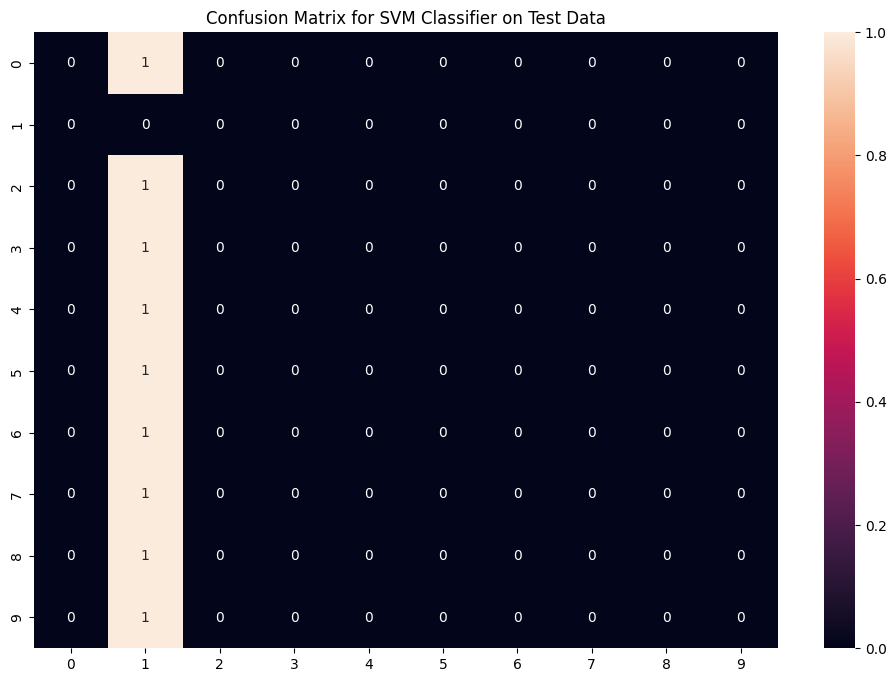

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 0.0


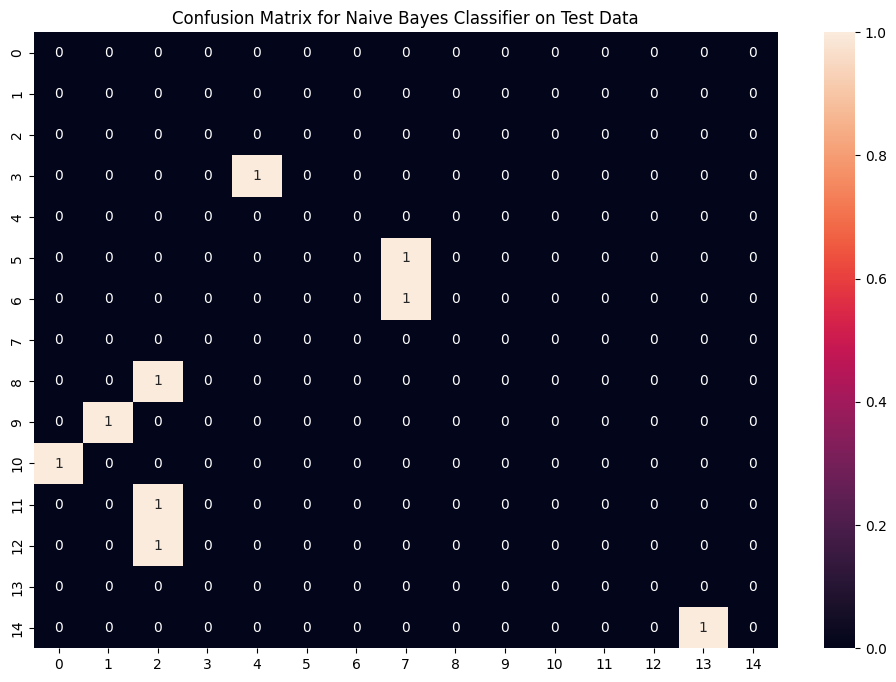

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 0.0


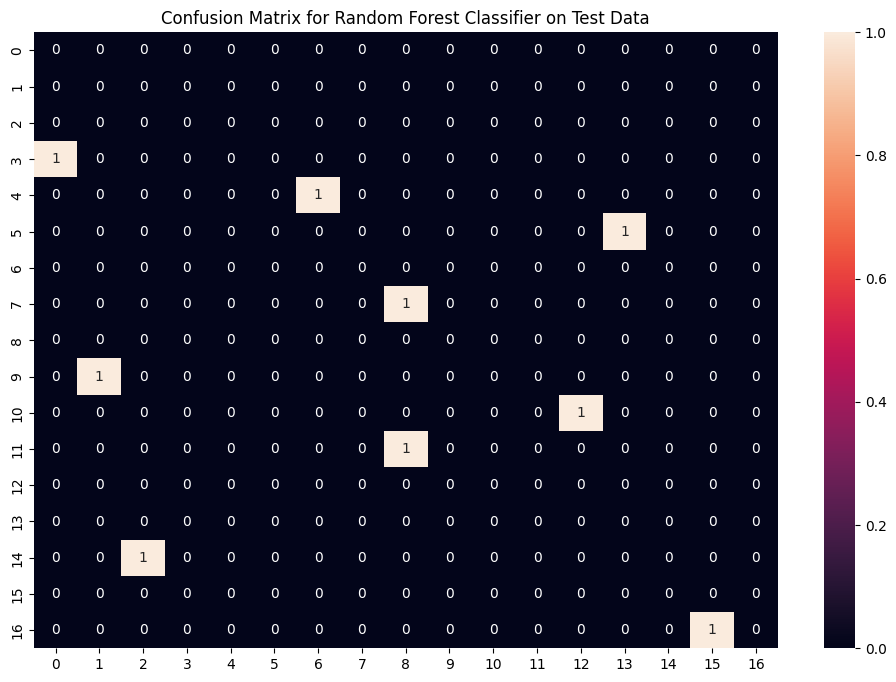

In [13]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
 
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()
 

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
 
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [ ]:
test_data = pd.read_csv("/kaggle/input/disease-prediction-using-machine-learning/Testing.csv")
test_X = test_data.drop('prognosis', axis=1)
test_Y = encoder.transform(test_data.prognosis)

Accuracy on Test dataset by the combined model: 100.0


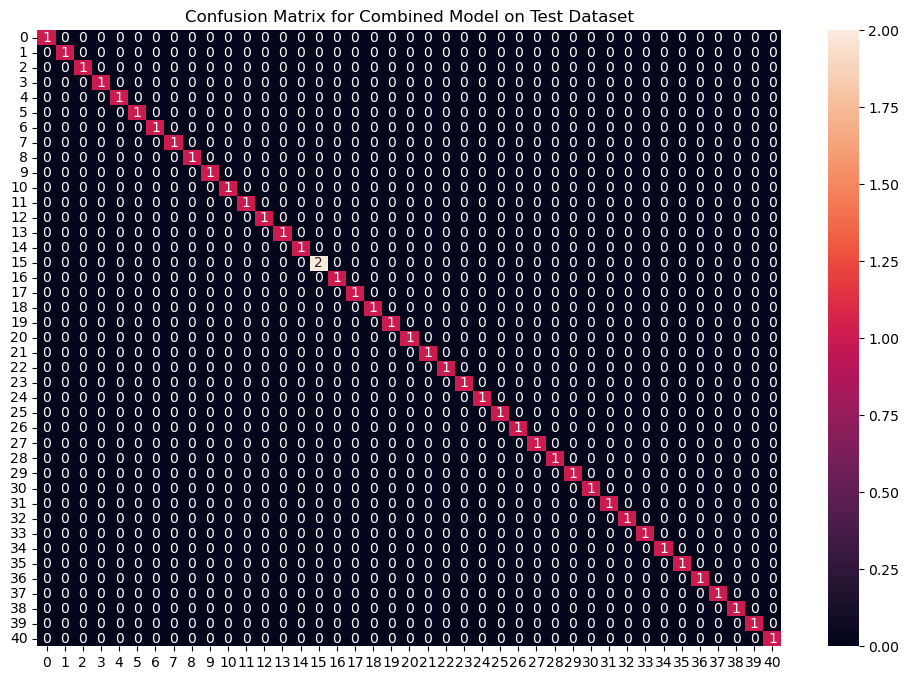

In [ ]:
# Training the models on whole data
models = [SVC(), GaussianNB(), RandomForestClassifier(random_state=18)]
preds = []
for i in range(3):
    models[i] = models[i].fit(X, y)
    preds.append(models[i].predict(test_X)) 

final_preds = [mode([i,j,k])[0][0] for i,j,k in zip(*preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")
 
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [ ]:
symptoms = X.columns.values
 
# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
 
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}
 
# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
     
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
         
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
     
    # generating individual outputs
    models_prediction = []
    for i in range(3):
        models_prediction.append(data_dict["predictions_classes"][models[i].predict(input_data)[0]]) 
     
    # making final prediction by taking mode of all predictions
    final_prediction = mode([*models_prediction])[0][0]
    predictions = {
        "rf_model_prediction": models_prediction[0],
        "naive_bayes_prediction": models_prediction[1],
        "svm_model_prediction": models_prediction[2],
        "final_prediction":final_prediction
    }
    return predictions
 
# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}
